# Decision tree
regression or classification by tree  
reference: http://www.randpy.tokyo/entry/python_random_forest  

In [31]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.externals.six import StringIO
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pydotplus
from IPython.display import Image
from graphviz import Digraph

In [16]:
# datasets
data = pd.read_csv("../datasets/titanic/train.csv")
data['Fare'] = data["Fare"].fillna(data["Fare"].median())
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna("S")

data["Sex"] = data["Sex"].apply(lambda x: 1 if x == 'male' else 0)
data["Embarked"] = data["Embarked"].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

data = data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1)

xx_train = data.drop('Survived', axis=1)
yy_train = data.Survived
x_train , x_test, y_train, y_test = train_test_split(xx_train, yy_train, test_size=0.3)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


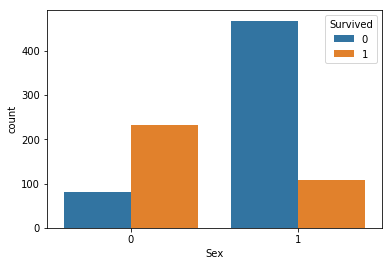

In [15]:
# visualize data
sns.countplot('Sex', hue='Survived', data=data)

In [18]:
# define model
dec_cls = DecisionTreeClassifier(random_state=0)
dec_cls = dec_cls.fit(x_train, y_train)
prediction = dec_cls.predict(x_test)

In [25]:
# accuracy
fpr, tpr, threshold = roc_curve(y_test, prediction, pos_label=1)
print(auc(fpr, tpr))
print(accuracy_score(prediction, y_test))

0.7556742323097463
0.7761194029850746


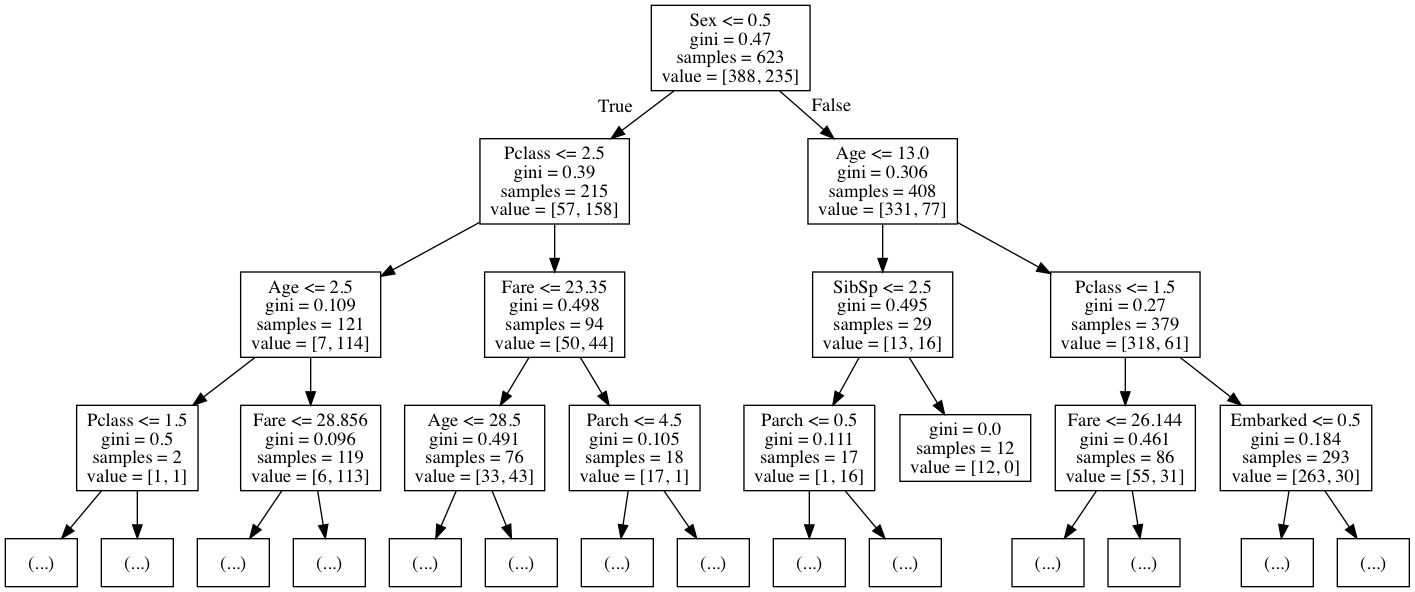

In [36]:
# visualize
dot_data = StringIO()
tree.export_graphviz(dec_cls, out_file=dot_data, feature_names=x_train.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())